# Data Science Jobs Salaries - Kaggle Dataset

Dataset Link : https://www.kaggle.com/datasets/saurabhshahane/data-science-jobs-salaries


References : https://medium.com/geekculture/i-analyzed-a-data-science-job-salaries-dataset-dca3c24081c0

In [167]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action = 'ignore')

About Dataset

work_year : 
The year during which the salary was paid. There are two types of work year values:
2020
Year with a definitive amount from the past
2021e
Year with an estimated amount (e.g. current year)

experience_level : 
The experience level in the job during the year with the following possible values:
EN
Entry-level / Junior
MI
Mid-level / Intermediate
SE
Senior-level / Expert
EX
Executive-level / Director

employment_type : 
The type of employement for the role:
PT
Part-time
FT
Full-time
CT
Contract
FL
Freelance

job_title : 
The role worked in during the year.
salary
The total gross salary amount paid.

salary_currency : 
The currency of the salary paid as an ISO 4217 currency code.

salaryinusd : 
The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).

employee_residence : 
Employee's primary country of residence in during the work year as an ISO 3166 country code.

remote_ratio : 
The overall amount of work done remotely, possible values are as follows:
0
No remote work (less than 20%)
50
Partially remote
100
Fully remote (more than 80%)

company_location : 
The country of the employer's main office or contracting branch as an ISO 3166 country code.

company_size : 
The average number of people that worked for the company during the year:
S
less than 50 employees (small)
M
50 to 250 employees (medium)
L
more than 250 employees (large)

Dataset Source - ai-jobs.net Salaries

In [168]:
df = pd.read_csv('Data Science Jobs Salaries.csv')
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,salary_in_inr,employee_residence,remote_ratio,company_location,company_size
0,2021,EN,FT,Data Science Consultant,54000,EUR,64369,4911354.7,DE,50,DE,L
1,2020,SE,FT,Data Scientist,60000,EUR,68428,5221056.4,GR,100,US,L
2,2021,EX,FT,Head of Data Science,85000,USD,85000,6485500.0,RU,0,RU,M
3,2021,EX,FT,Head of Data,230000,USD,230000,17549000.0,RU,50,RU,L
4,2021,EN,FT,Machine Learning Engineer,125000,USD,125000,9537500.0,US,100,US,S


In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           245 non-null    int64  
 1   experience_level    245 non-null    object 
 2   employment_type     245 non-null    object 
 3   job_title           245 non-null    object 
 4   salary              245 non-null    int64  
 5   salary_currency     245 non-null    object 
 6   salary_in_usd       245 non-null    int64  
 7   salary_in_inr       245 non-null    float64
 8   employee_residence  245 non-null    object 
 9   remote_ratio        245 non-null    int64  
 10  company_location    245 non-null    object 
 11  company_size        245 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 23.1+ KB


In [170]:
df.shape

(245, 12)

In [171]:
df.dtypes

work_year               int64
experience_level       object
employment_type        object
job_title              object
salary                  int64
salary_currency        object
salary_in_usd           int64
salary_in_inr         float64
employee_residence     object
remote_ratio            int64
company_location       object
company_size           object
dtype: object

In [172]:
df.describe()

,work_year,salary,salary_in_usd,salary_in_inr,remote_ratio
count,245.000000,2.450000e+02,245.000000,2.450000e+02,245.000000
mean,2020.730612,5.025418e+05,99868.012245,7.619929e+06,69.183673
std,0.444550,2.276230e+06,83983.326949,6.407928e+06,37.593421
min,2020.000000,4.000000e+03,2876.000000,2.194388e+05,0.000000
25%,2020.000000,6.000000e+04,45896.000000,3.501865e+06,50.000000
50%,2021.000000,1.030000e+05,81000.000000,6.180300e+06,100.000000
75%,2021.000000,1.740000e+05,130000.000000,9.919000e+06,100.000000
max,2021.000000,3.040000e+07,600000.000000,4.578000e+07,100.000000


In [173]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
salary_in_inr         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [174]:
df = df.drop(['salary', 'salary_in_usd', 'salary_currency'], axis = 1)
# We have dropped redundant columns.

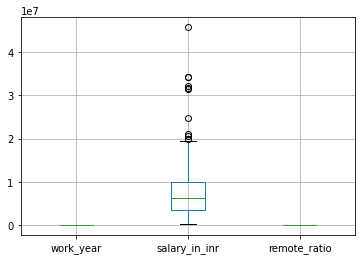

In [175]:
df.boxplot()
plt.show()

# There are outliers present in salary_in_inr column.
# We will use IQR method to remove the outliers.

In [176]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~(((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5*IQR))).any(axis = 1))]
# We have removed the outliers.

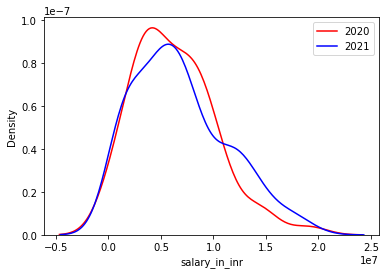

In [177]:
sns.kdeplot(df[df['work_year'] == 2020]['salary_in_inr'], color = 'r', label = '2020')
sns.kdeplot(df[df['work_year'] == 2021]['salary_in_inr'], color = 'b', label = '2021')
plt.legend()
plt.show()

In [178]:
# Distribution of salaries of Data Science Jobs in 2020 vs 2021.
# There is not much difference in the salaries of Data Science Jobs for year 2020 vs 2021.

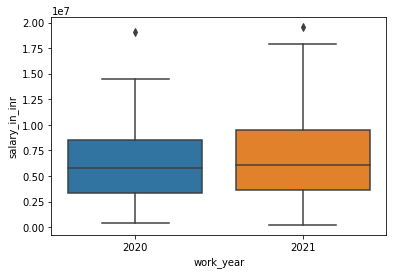

In [179]:
sns.boxplot(df['work_year'], df['salary_in_inr'])
plt.show()

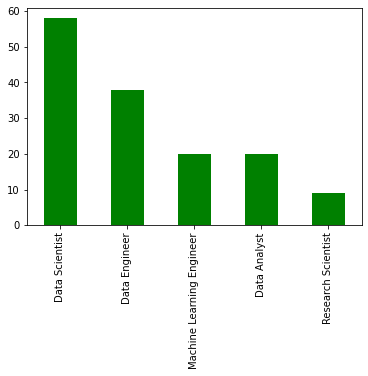

In [180]:
df['job_title'].value_counts().head(5).plot(kind = 'bar', color = 'g')
plt.show()

In [181]:
# Data Scientist roles are the highest in no. in the Data Science industry followed by Data Engineers.

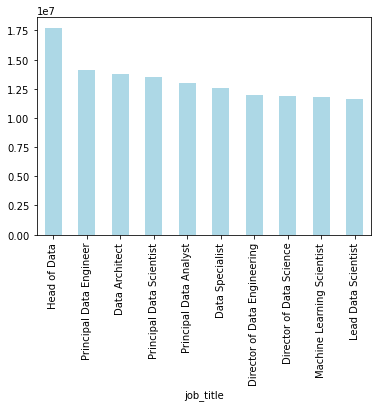

In [182]:
df.groupby('job_title')['salary_in_inr'].mean().sort_values(ascending = False).head(10).plot(kind = 'bar', color = 'lightblue')
plt.show()

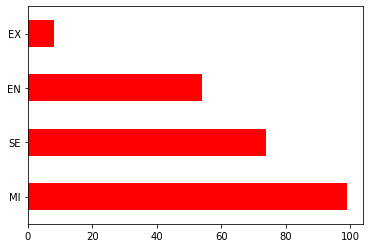

In [183]:
df['experience_level'].value_counts().plot(kind = 'barh', color = 'r')
plt.show()

In [184]:
# There are more no. of people working at Middle Experience Level than those at Senior and Entry Level Experience.

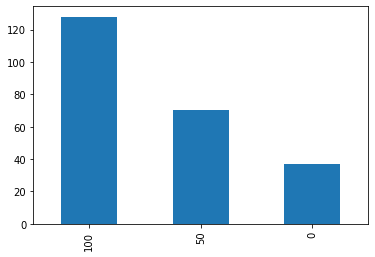

In [185]:
df['remote_ratio'].value_counts().plot(kind = 'bar')
plt.show()

In [186]:
# There are more jobs having > 80 % of the work as remote. 

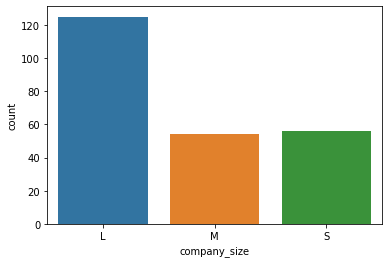

In [187]:
sns.countplot(df['company_size'])
plt.show()

# Majority of the people are working in Large Sized Companies, nearly twice than that of 
# Middle Sized and Small Sized companies.

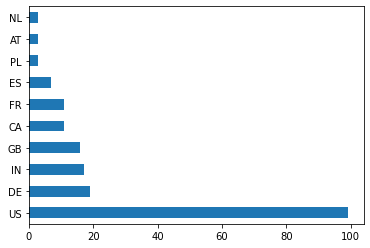

In [188]:
df['company_location'].value_counts().head(10).plot(kind = 'barh')
plt.show()

In [189]:
# Majority of the people are working in companies located in US.

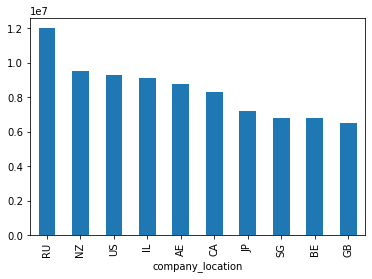

In [190]:
df.groupby('company_location')['salary_in_inr'].mean().sort_values(ascending = False).head(10).plot(kind = 'bar')
plt.show()

In [191]:
# Russia is paying the highest salary to the professionals woring in the Data Science Industry followed by New Zealand.

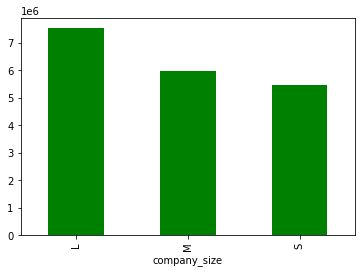

In [192]:
df.groupby('company_size')['salary_in_inr'].mean().sort_values(ascending = False).head(10).plot(kind = 'bar', color = 'g')
plt.show()

In [193]:
# Large sized companies are paying more salaries to its employees as compared to small and mid sized companies.

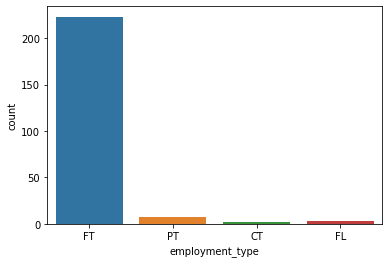

In [194]:
sns.countplot(df['employment_type'])
plt.show()

In [195]:
# Majority of the professionals are working as Full Time Employees.

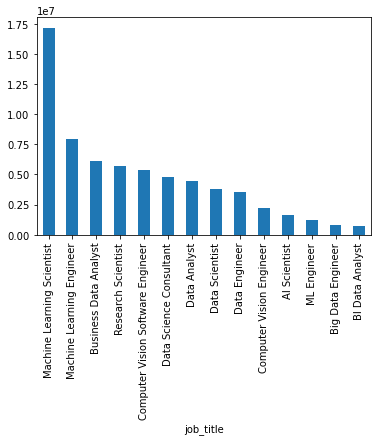

In [213]:
df[df['experience_level'] == 'EN'][['job_title','salary_in_inr']].groupby('job_title')['salary_in_inr'].mean().sort_values(ascending = False).plot(kind = 'bar')
plt.show()

In [ ]:
# For Entry level roles, ML Scientists are bagging the highest salaries followed by ML Engineer roles.

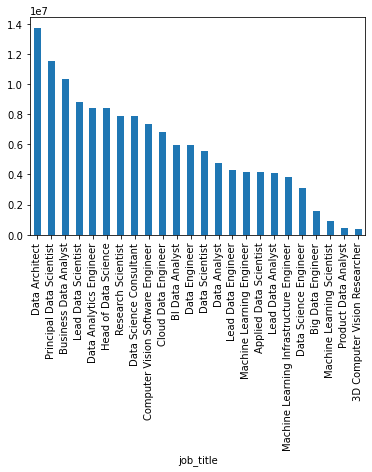

In [214]:
df[df['experience_level'] == 'MI'][['job_title','salary_in_inr']].groupby('job_title')['salary_in_inr'].mean().sort_values(ascending = False).plot(kind = 'bar')
plt.show()

In [ ]:
# For Medium Experience level roles, Data Architect Roles are bagging the highest salaries 
# followed by Principal Data Scientist Roles.

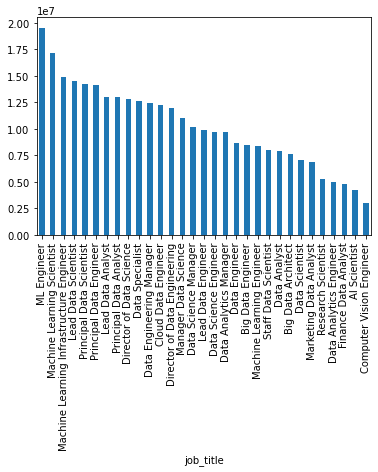

In [215]:
df[df['experience_level'] == 'SE'][['job_title','salary_in_inr']].groupby('job_title')['salary_in_inr'].mean().sort_values(ascending = False).plot(kind = 'bar')
plt.show()

In [ ]:
# For Senior Experience level roles, ML Engineer Roles are bagging the highest salaries 
# followed by ML Scientist Roles.

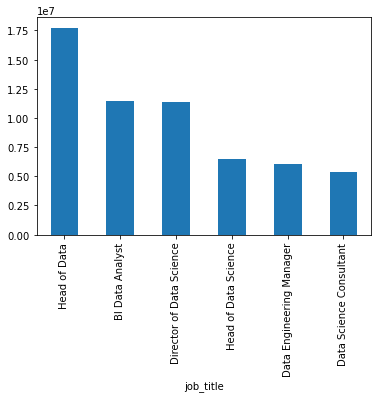

In [216]:
df[df['experience_level'] == 'EX'][['job_title','salary_in_inr']].groupby('job_title')['salary_in_inr'].mean().sort_values(ascending = False).plot(kind = 'bar')
plt.show()

In [ ]:
# For Executive Experience level roles, Head of Data Roles are bagging the highest salaries 
# followed by BI Data Analyst Roles.

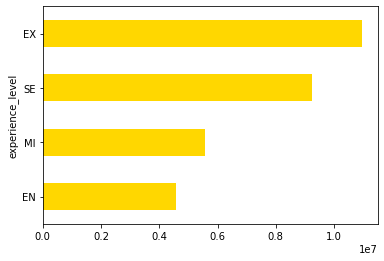

In [240]:
df.groupby('experience_level')['salary_in_inr'].mean().sort_values(ascending = True).plot(kind = 'barh', color = 'gold')
plt.show()

In [ ]:
# Executive Level roles are having the highest salaries followed by Senior Level, 
# then by Middle Level and then by Entry Level Roles.